In [2]:
#using Pkg
#Pkg.add("Symbolics")
using Symbolics
using Plots

In [3]:
function error_metric(xaprox::Float64, xtarget::Float64, is_absolute::Bool)
    
    """
        This function calculates the error between the aproximation and the real value
        

        Parameters
        ----------
        xaprox: Float64, The aproximation of the of the function.
        xtarget: Float64, The real value we want.
        is_absolute: Bool, If true then the error is absolute, if false then the error is relative.

        Returns
        -------
        Float64, The error between the aproximation and the real value of the root of the function.
    """
    
    if is_absolute
        return abs(xtarget - xaprox) 
    else
        return abs(xtarget - xaprox)/xtarget
    end
    
end

error_metric (generic function with 1 method)

![Point 2 instructions](image.png)

--------------------------
**i. Empezaremos entonces por obtener el valor analítico de la función:**

In [4]:
f = x -> 6 + 3*cos(x)
int_f = x -> 6*x + 3*sin(x)

start = 0.0
stop = π/2
exact_value = int_f(stop) - int_f(start)
print("The exact value of the integral between  [$(start), $(stop)] is: ", exact_value)

The exact value of the integral between  [0.0, 1.5707963267948966] is: 12.42477796076938

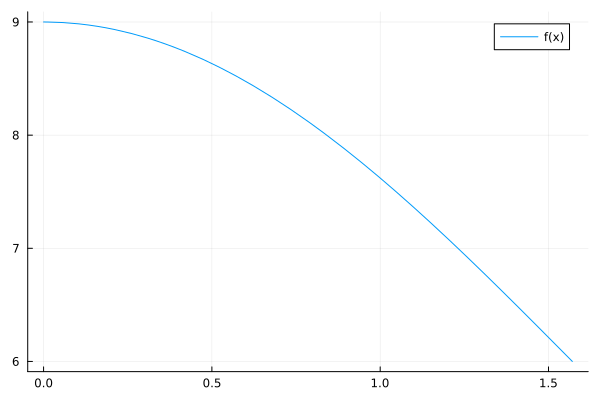

In [5]:
plot(f, start, stop, label="f(x)")

------------------
**ii. Veamos los resultados de la integración con una sola aplicación de la regla del trapecio:**

In [6]:
function trapezoidal_approx(f::Function, x0::Float64, x1::Float64)::Float64
    """
    This function computes the trapezoidal approximation of the integral of f between x0 and x1.
    
    Input:
    ----------------
    f: Function
        The function to be integrated.
    x0: Float64
        The lower bound of the integral.
    x1: Float64
        The upper bound of the integral.

    Output:
    ----------------
    Float64
        The trapezoidal approximation of the integral of f between x0 and x1.
    """

    epsilon = x1 - x0
    return (epsilon/2)*(f(x0) + f(x1))
end

trapezoidal_approx (generic function with 1 method)

In [7]:
trapezoidal_approx_f = trapezoidal_approx(f, start, stop)
abs_error = error_metric(trapezoidal_approx_f, exact_value, true)
relative_error = error_metric(trapezoidal_approx_f, exact_value, false)

print("\nThe trapezoidal approximation of the integral of f between [$(start), $(stop)] is: ", trapezoidal_approx_f)
print("\nThe absolute error of the trapezoidal approximation is: ", abs_error)
print("\nThe relative error of the trapezoidal approximation is: $(relative_error)%")


The trapezoidal approximation of the integral of f between [0.0, 1.5707963267948966] is: 11.780972450961723
The absolute error of the trapezoidal approximation is: 0.643805509807656
The relative error of the trapezoidal approximation is: 0.0518162587565299%

------------------
**iii. Con una aplicación múltiple de la regla del trapecio $n=2$, $n=4$:**

In [8]:
function trapezoidal_composite(f::Function, x0::Float64, x1::Float64, epsilon::Float64)::Float64

    xs = [x for x in x0:epsilon:x1]

    integral = 0.0

    for i in 2:length(xs) - 1
        integral += 2*f(xs[i])
    end
    
    integral += f(x0) + f(x1)
    integral *= (epsilon/2)

    return integral
end

function trapezoidal_composite(f::Function, x0::Float64, x1::Float64, n::Integer)::Float64

    epsilon = (x1 - x0)/n
    xs = [(x0 + i*epsilon) for i in 1:1:n-1]

    integral = 0.0

    for x in xs
        integral += 2*f(x)
    end
    
    integral += f(x0) + f(x1)
    integral *= (epsilon/2)

    return integral
end


trapezoidal_composite (generic function with 2 methods)

In [9]:
n = 2

trapezoidal_composite_f = trapezoidal_composite(f, start, stop, n)
abs_error = error_metric(trapezoidal_composite_f, exact_value, true)
relative_error = error_metric(trapezoidal_composite_f, exact_value, false)

print("\nThe trapezoidal composite n = $(n), approximation of the integral of f between [$(start), $(stop)] is: ", trapezoidal_composite_f)
print("\nThe absolute error of the trapezoidal composite approximation is: ", abs_error)
print("\nThe relative error of the trapezoidal composite approximation is: $(relative_error)%")


The trapezoidal composite n = 2, approximation of the integral of f between [0.0, 1.5707963267948966] is: 12.268956307674939
The absolute error of the trapezoidal composite approximation is: 0.1558216530944403
The relative error of the trapezoidal composite approximation is: 0.012541202232059151%

In [10]:
n = 4

trapezoidal_composite_f = trapezoidal_composite(f, start, stop, n)
abs_error = error_metric(trapezoidal_composite_f, exact_value, true)
relative_error = error_metric(trapezoidal_composite_f, exact_value, false)

print("\nThe trapezoidal composite n = $(n), approximation of the integral of f between [$(start), $(stop)] is: ", trapezoidal_composite_f)
print("\nThe absolute error of the trapezoidal composite approximation is: ", abs_error)
print("\nThe relative error of the trapezoidal composite approximation is: $(relative_error)%")


The trapezoidal composite n = 4, approximation of the integral of f between [0.0, 1.5707963267948966] is: 12.386125363687706
The absolute error of the trapezoidal composite approximation is: 0.03865259708167379
The relative error of the trapezoidal composite approximation is: 0.003110928597977159%

------------------
**iv. Con una sola aplicación de la regla de Simpson 1/3:**

In [11]:
function simpson_rule_approx(f::Function, x0::Float64, x1::Float64)::Float64
    epsilon = (x1 - x0)/2
    x2 = (x0 + x1)/2
    return (epsilon/3)*(f(x0) + 4*f(x2) + f(x1))
end

simpson_rule_approx (generic function with 1 method)

In [12]:
simpson_rule_approx_f = simpson_rule_approx(f, start, stop)
abs_error = error_metric(simpson_rule_approx_f, exact_value, true)
relative_error = error_metric(simpson_rule_approx_f, exact_value, false)

print("\nThe simpson rule approximation of the integral of f between [$(start), $(stop)] is: ", simpson_rule_approx_f)
print("\nThe absolute error of the simpson rule approximation is: ", abs_error)
print("\nThe relative error of the simpson rule approximation is: $(relative_error)%")


The simpson rule approximation of the integral of f between [0.0, 1.5707963267948966] is: 12.43161759324601
The absolute error of the simpson rule approximation is: 0.006839632476630442
The relative error of the simpson rule approximation is: 0.0005504832760976689%

------------------
**v. Con una aplicación múltiple de la regla de Simpson 1/3 $n=4$:**

In [13]:
function simpson_composite(f::Function, x0::Float64, x1::Float64, epsilon::Float64)::Float64

    xs = [x for x in x0:epsilon:x1]
    n = length(xs)

    integral = 0.0

    #this does not follow the literal formula in the slides, but it is equivalent
    #it's just adapted to the way the xs are generated
    for i in 2:n-1
        if i % 2 != 0
            integral += 2*f(xs[i])
        else
            integral += 4*f(xs[i])
        end
    end
    
    integral += f(x0) + f(x1)
    integral *= (epsilon/3)

    return integral
end

function simpson_composite(f::Function, x0::Float64, x1::Float64, n::Integer)::Float64

    epsilon = (x1 - x0)/n
    xs = [(x0 + i*epsilon) for i in 1:1:n-1]

    integral = 0.0

    for i in 1:1:n-1
        if i % 2 == 0
            integral += 2*f(xs[i])
        else
            integral += 4*f(xs[i])
        end
    end
    
    integral += f(x0) + f(x1)
    integral *= (epsilon/3)

    return integral
end

simpson_composite (generic function with 2 methods)

In [14]:
n = 4

simpson_composite_f = simpson_composite(f, start, stop, n)
abs_error = error_metric(simpson_composite_f, exact_value, true)
relative_error = error_metric(simpson_composite_f, exact_value, false)

print("\nThe simpson composite n = $(n), approximation of the integral of f between [$(start), $(stop)] is: ", simpson_composite_f)
print("\nThe absolute error of the simpson composite approximation is: ", abs_error)
print("\nThe relative error of the simpson composite approximation is: $(relative_error)%")


The simpson composite n = 4, approximation of the integral of f between [0.0, 1.5707963267948966] is: 12.425181715691961
The absolute error of the simpson composite approximation is: 0.00040375492258171164
The relative error of the simpson composite approximation is: 3.249594671683854e-5%

------------------
vi. Con una sola aplicación de la regla de Simpson 3/8:

In [15]:
function simpson_fraction_rule_approx(f::Function, x0::Float64, x1::Float64)::Float64
    """
    Simpson's Fractional Rule
    """

    # 3/8 Simpson's Rule
    # using 4 points
    n = 3
    epsilon = (x1 - x0)/n

    xs = [x0 + i*epsilon for i in 0:n]
    coefficients = [1, 3, 3, 1]
    integral = 0.0

    for i in 1:length(xs)
        integral += (f(xs[i]) * coefficients[i]) * (3/8) * epsilon
    end

    return integral
end

simpson_fraction_rule_approx (generic function with 1 method)

In [16]:
simpson_fraction_rule_approx_f = simpson_fraction_rule_approx(f, start, stop)
abs_error = error_metric(simpson_fraction_rule_approx_f, exact_value, true)
relative_error = error_metric(simpson_fraction_rule_approx_f, exact_value, false)

print("\nThe simpson fraction rule approximation of the integral of f between [$(start), $(stop)] is: ", simpson_fraction_rule_approx_f)
print("\nThe absolute error of the simpson fraction rule approximation is: ", abs_error)
print("\nThe relative error of the simpson fraction rule approximation is: $(relative_error)%")


The simpson fraction rule approximation of the integral of f between [0.0, 1.5707963267948966] is: 12.427792730712216
The absolute error of the simpson fraction rule approximation is: 0.0030147699428368924
The relative error of the simpson fraction rule approximation is: 0.0002426417560423115%

----------
vii. Con una aplicación múltiple de la regla de Simpson 3/8 $n=6$:

In [17]:
function simpson_fraction_composite(f::Function, x0::Float64, x1::Float64, epsilon::Float64)::Float64
    """
    Simpson's Fractional Rule, Composite
    """

    xs = [x for x in x0:epsilon:x1]
    n = length(xs)

    integral = 0.0

    for i in 1:n-1
        integral += simpson_fraction_rule_approx(f, xs[i], xs[i+1])
    end

    return integral
end

function simpson_fraction_composite(f::Function, x0::Float64, x1::Float64, n::Integer)::Float64
    """
    Simpson's Fractional Rule, Composite
    """

    epsilon = (x1 - x0)/n
    xs = [(x0 + i*epsilon) for i in 0:1:n]

    integral = 0.0

    for i in 1:n
        integral += simpson_fraction_rule_approx(f, xs[i], xs[i+1])
    end

    return integral
end

simpson_fraction_composite (generic function with 2 methods)

In [18]:
n = 6

simpson_fraction_composite_f = simpson_fraction_composite(f, start, stop, n)
abs_error = error_metric(simpson_fraction_composite_f, exact_value, true)
relative_error = error_metric(simpson_fraction_composite_f, exact_value, false)

print("\nThe simpson fraction composite n = $(n), approximation of the integral of f between [$(start), $(stop)] is: ", simpson_fraction_composite_f)
print("\nThe absolute error of the simpson fraction composite approximation is: ", abs_error)
print("\nThe relative error of the simpson fraction composite approximation is: $(relative_error)%")


The simpson fraction composite n = 6, approximation of the integral of f between [0.0, 1.5707963267948966] is: 12.42478013952675
The absolute error of the simpson fraction composite approximation is: 2.1787573700748908e-6
The relative error of the simpson fraction composite approximation is: 1.7535583951312525e-7%

------------------------
![Punto B primera parte](image-1.png)
![Punto B segunda parte](image-2.png)

In [19]:
function romberg_approx(f::Function, x0::Float64, x1::Float64, n::Integer)::Float64
    """
    Romberg's Method
    """

    ns = [2^i for i in 0:n]

    # first round of trapezoidal rule
    r = [trapezoidal_composite(f, x0, x1, n) for n in ns]

    # next rounds
    while length(r) >= 2 
        
        r_placeholder = zeros(length(r) - 1)
        
        for i in 1:length(r) - 1
            r_placeholder[i] = (4*r[i+1] - r[i])/3
        end
    
        r = r_placeholder
    end

    return r[1]
end

romberg_approx (generic function with 1 method)

In [20]:
qt = t -> 9 + 5*(cos(0.4)^2)*t
ct = t -> (5*exp(-0.5*t)) + 2*exp(0.15*t)
mt = t -> qt(t)*ct(t)

mt_int = t -> exp(-0.5*t)*(-42.4177*t + exp(0.65*t)*(56.5569*t - 257.046) - 174.835)

#33 (generic function with 1 method)

In [21]:
start_t = 2.0 
end_t = 8.0
exact_value = mt_int(end_t) - mt_int(start_t)

929.1794683523293

In [26]:
n = 1
romberg_approx_mt = romberg_approx(mt, start_t, end_t, n)
abs_error = error_metric(romberg_approx_mt, exact_value, true)
relative_error = error_metric(romberg_approx_mt, exact_value, false)

print("\nThe romberg approximation of the integral of mt between [$(start_t), $(end_t)] is: ", romberg_approx_mt)
print("\nThe absolute error of the romberg approximation is: ", abs_error)
print("\nThe relative error of the romberg approximation is: $(relative_error)%")


The romberg approximation of the integral of mt between [2.0, 8.0] is: 929.594943800041
The absolute error of the romberg approximation is: 0.41547544771174216
The relative error of the romberg approximation is: 0.0004471423033576984%

--------------------------
![punto c del punto 2](image-3.png)

In [27]:
g = 9.81 #m/s^2
c = 10.0 #kg/s
start_t = 0.0 #s
end_t = 8.0 #s
m = 80 #kg

vt = t -> (g*m/c)*(1 - exp(-(c/m)*t))
xt = t -> (m*g) * (m * exp(-(c/m)*t) + c*t)/c^2

exact_value = xt(end_t) - xt(start_t)

230.96942834507843

In [29]:
n = 1
romberg_approx_xt = romberg_approx(vt, start_t, end_t, n)

print("\nThe romberg approximation of the integral of vt between [$(start_t), $(end_t)] is: ", romberg_approx_xt)
print("\nThe absolute error of the romberg approximation is: ", abs_error)
print("\nThe relative error of the romberg approximation is: $(relative_error)%")


The romberg approximation of the integral of vt between [0.0, 8.0] is: 230.83562234650046
The absolute error of the romberg approximation is: 0.41547544771174216
The relative error of the romberg approximation is: 0.0004471423033576984%